A szűrés lehetővé teszi bizonyos sorok kiválasztását a DataFrame-ből bizonyos feltételek alapján. Használhat összehasonlító operátorokat (pl. >, <, ==) vagy logikai indexelést a sorok szűrésére. Például használhatja a df.loc[df["oszlop"] > értéket] az összes olyan sor kiválasztásához, ahol az "oszlop" oszlopban lévő érték nagyobb egy bizonyos értéknél.

A következő panda módszereket fogjuk használni:

     df.iloc
     df.loc
     df.query

Az adatkészlet, amelyet használni fogunk, egy olyan, amely a FIFA Players 22-t tartalmazza. Mielőtt elkezdené a projekt tevékenységeit, tegyünk egy kis felfedezést együtt. Nyugodtan hagyja ki ezt a részt, és ugorjon a tevékenységekhez.

#### Alapvető szűrés

Kezdjük a DataFrames első alapvető Pandas metódusaival. Kísérletezni fogunk a df.iloc[] és a df.loc[] fájlokkal.

     Először futtassa az összes cellát a kérdésig. A cellák futtatása közben tanulja meg, mit mondanak az egyes kimenetek. Ezenkívül megtekintheti a vizualizációkat, hogy többet megtudjon a FIFA 22 Players adatkészletéről.

Az alábbi kérdések a Jupyter notebook Szűrés című részéből indulnak ki.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

basepath = r'..\..\source\players_22.csv'

df = pd.read_csv(basepath, dtype={25: str, 108: str})
pd.set_option('display.max_columns',110)
df.head()



,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


In [4]:
print(df.shape)

(19239, 110)


In [5]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


In [7]:
df.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


#### Néhány vizualizáció az adatok megértéséhez

<Axes: ylabel='Frequency'>

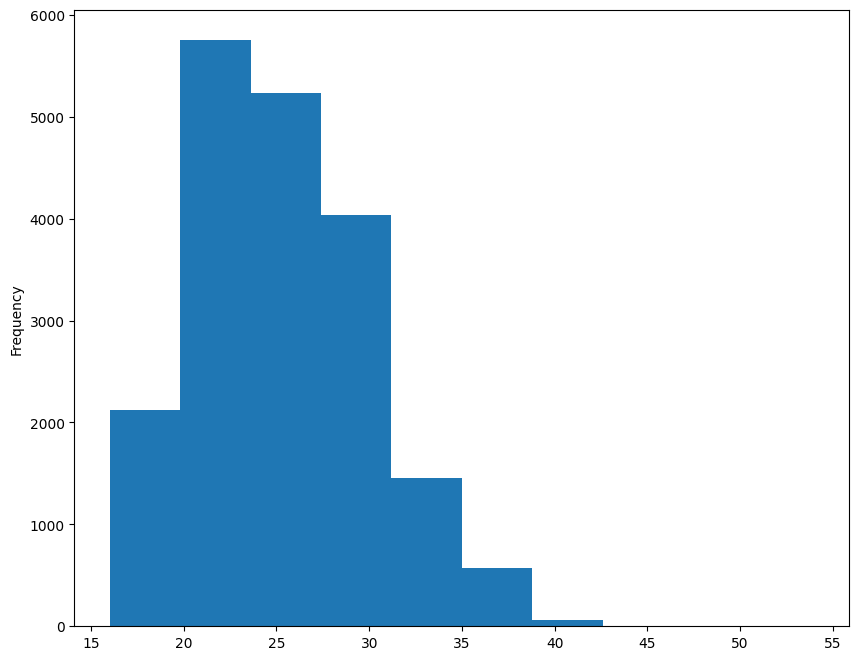

In [12]:
df['age'].plot(kind='hist', figsize=(10, 8))

<Axes: >

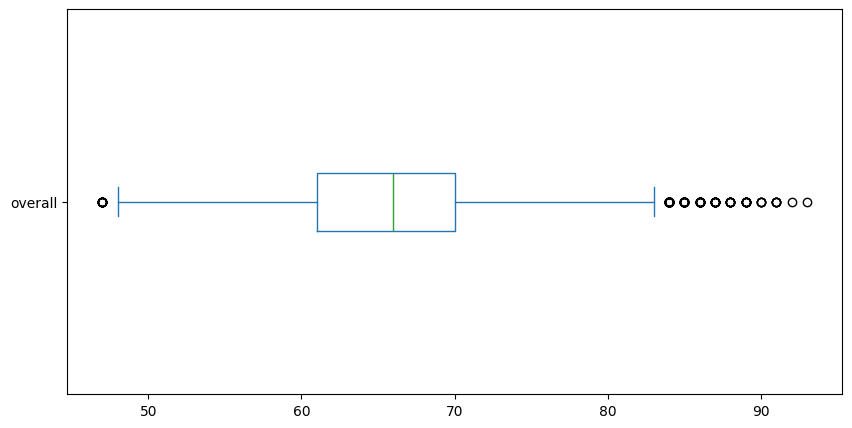

In [13]:
df['overall'].plot(kind='box', vert=False, figsize=(10, 5))

<Axes: xlabel='age', ylabel='Count'>

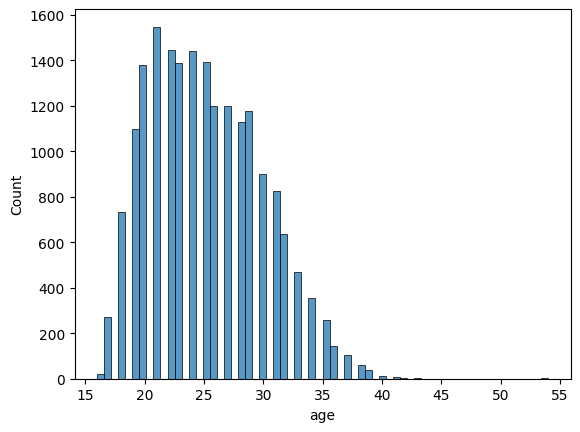

In [19]:
sns.histplot(df['age'])

<Axes: ylabel='count'>

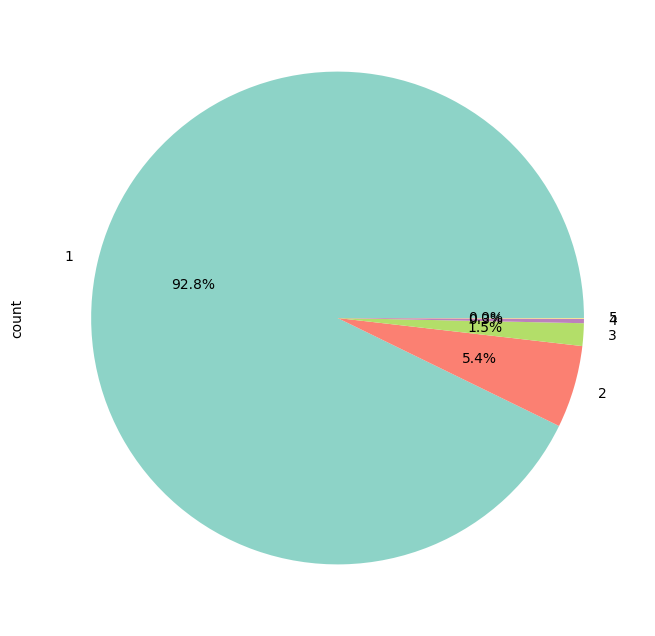

In [16]:
df['international_reputation'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap='Set3', figsize=(10, 8))

<Axes: ylabel='count'>

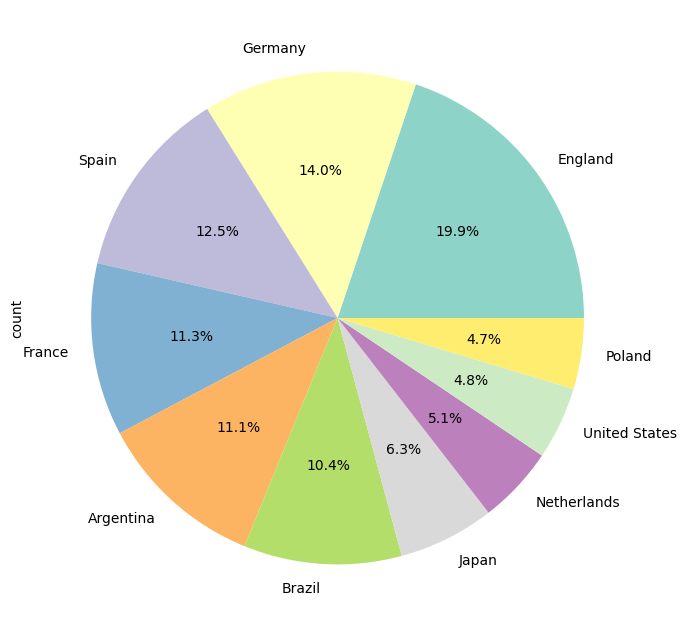

In [17]:
df['nationality_name'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%', cmap='Set3', figsize=(10, 8))

<Axes: ylabel='count'>

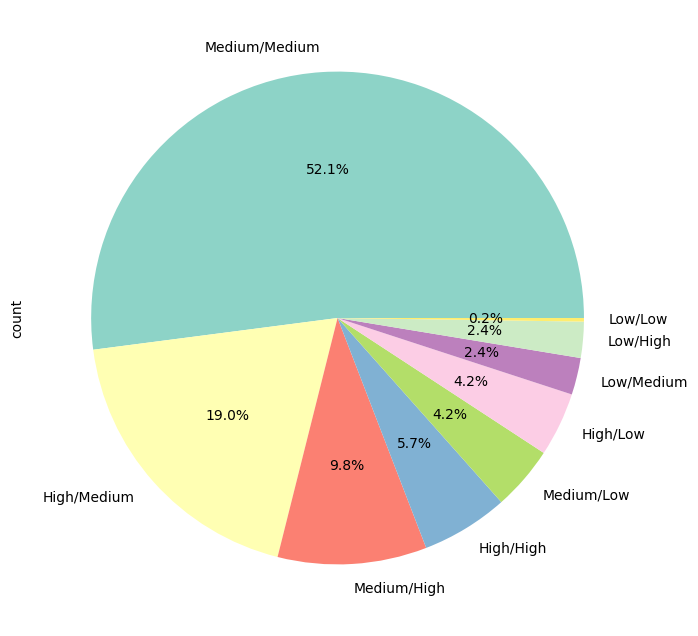

In [18]:
df['work_rate'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap='Set3', figsize=(10, 8))

Jelölje ki az összes sort és az első 5 oszlopot az adatkeretből, és tárolja őket a df_first_five_cols változóban

Az eredmény ellenőrzéséhez meg kell jeleníteni az első öt oszlopot az összes sorával együtt.

In [ ]:
df_first_five_cols = df.iloc[:,0:5]

Válassza ki az Egyéni sorrendben az adott oszlopokat

Válassza ki az összes sort, és bontsa ki a 3., 6., 4. és 1. indexű oszlopokat a DataFrame-ből, a megadott sorrendbe rendezve. Tárolja a kiválasztást a df_order_cols változóban. Ehhez a feladathoz használhatja az .iloc vagy .loc fájlokat is. Ez a kérdés az előzőre épül, ezért érdemes kísérletezni az oszlopindexekkel.

In [ ]:
df_order_cols = df.iloc[:,[1,3,4,6]]

Szűrje ki az első 50 sort a 3,6,4,1 oszlopból a fifty_rows változóba

Ez a kérdés csak a fentiek kiterjesztése. Játssz a sorvágással.

In [ ]:
fifty_rows = df.iloc[0:50,[1,3,4,6]] # Az 50 már nem lesz benne így megy a 0-49 sorig

Jelölje ki az összes sort, és az oszlopok ['short_name', 'age', 'player_positions', 'overall', 'value_eur'] az adatkeretből eltárolják a választást a named_cols változóban

Amikor megadjuk az oszlopok nevét, mindig használja a df.loc[] parancsot. (Helyindexelő/Címkeindexelő) Ha sorokhoz vagy oszlopokhoz adunk meg indexeket, mindig a df.iloc[]-t használja. (Egész számkereső. És legyen óvatos, az indexek 0-tól kezdődnek)

In [ ]:
cols = ['short_name', 'age', 'player_positions', 'overall', 'value_eur']
named_cols= df.loc[:,cols]

Szűrje ki az első 14 sort és az oszlopokat ['short_name", "age", "player_positions", "overall", "value_eur"] az adatkeretből, és tárolja az eredményt a named_cols_rows változóban

Ez a kérdés csak az előző kérdés kiterjesztése. Játssz a sorindexekkel.

In [2]:
cols = ['short_name', 'age', 'player_positions', 'overall', 'value_eur']
named_cols= df.loc[:13,cols]

In [3]:
named_cols

,short_name,age,player_positions,overall,value_eur
0,L. Messi,34,"RW, ST, CF",93,78000000.0
1,R. Lewandowski,32,ST,92,119500000.0
2,Cristiano Ronaldo,36,"ST, LW",91,45000000.0
3,Neymar Jr,29,"LW, CAM",91,129000000.0
4,K. De Bruyne,30,"CM, CAM",91,125500000.0
5,J. Oblak,28,GK,91,112000000.0
6,K. Mbappé,22,"ST, LW",91,194000000.0
7,M. Neuer,35,GK,90,13500000.0
8,M. ter Stegen,29,GK,90,99000000.0
9,H. Kane,27,ST,90,129500000.0


#### Activities for df.loc, df.query with Conditioning (| or, & and, Not ~)

Tudja meg, hány 90-nél nagyobb összbesorolású játékos található az adatkészletben?

In [ ]:
df.loc[df['overall'] > 90].count()

Nézze meg, hány játékos van az adatkészletben 20 000-nél kisebb_eur értékkel

In [ ]:
df.loc[df['value_eur'] <= 20_000].count()

Válassza ki a club_name='Manchester City' játékosok hosszú_nevét és életkorát, és tárolja a választást a long_name_age változóban

Itt be kell építeni a feltételt az előző oldalon tanult szűrési technikákkal.

In [12]:
long_name_age = df[df['club_name']=='Manchester City'][['long_name','age']]


In [ ]:
df.query("club_name == 'Manchester City'")[['long_name', 'age']]

Szűrje ki azokat a játékosokat, akik a Liverpool klub játékosai és Brazíliából származnak, és tárolja őket a liverpool_brazil változóban

Megjegyzés: Használja a klub_nevet és a nemzetiségi_nevet

In [16]:
liverpool_brazil = df[(df['club_name'] == 'Liverpool') & (df['nationality_name'] == 'Brazil')]

In [ ]:
df.loc[(df['club_name'] == 'Liverpool') & (df['nationality_name'] == 'Brazil')]


In [ ]:
df.query("club_name == 'Liverpool' and nationality_name == 'Brazil'")

Hány játékos van, akinek mentalitás_agressziója > 91 vagy power_stamina < 80


In [ ]:
df[(df['mentality_aggression'] > 91) | (df['power_stamina'] < 80)].count()

Válassza ki az összes francia játékost, akinek mentality_aggression > 91 vagy power_stamina < 80, és tárolja a szűrt adatokat a france_player változóban


In [17]:
france_player = df[(df['nationality_name'] == 'France') & ((df['mentality_aggression'] > 91) | (df['power_stamina'] < 80))]

Hány játékos bal lábának van preferált_lábja, írja ki a rövid_nevét, az életkorát és a preferált_lábát is

Tárolja az eredményt a left_foot_players változóban.

In [19]:
left_foot_players = df[(df['preferred_foot'] == 'Left')][['short_name', 'age', 'preferred_foot']]